# Explore

In [11]:
import wrangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrangle

**Prep data**

In [12]:
train, val, test = wrangle.wrangle_readmes()

In [40]:
# Generate random numbers between 1 and 5
random_numbers = np.random.randint(1, 6, size=len(train))
train["rating"] = random_numbers
train.head(2)

,url,pros,cons,pros_cleaned_content,pros_lemmatized,cons_cleaned_content,cons_lemmatized,rating,binned_rating,name
362,https://www.glassdoor.com/Reviews/Republic-Ser...,Good room for growth at republic!!!! High Sala...,None that I can think of at the moment Cant re...,good room for growth at republic high salary ...,good room growth republic high salary great be...,none that i can think of at the moment cant re...,none think moment cant really think con best j...,2,Four,Republic Services
269,https://www.glassdoor.com/Reviews/Macquarie-Gr...,"Great culture, great benefits, the ability to ...",Experience in the firm can vary based on the d...,great culture great benefits the ability to pu...,great culture great benefit ability purchase e...,experience in the firm can vary based on the d...,experience firm vary based department team gre...,5,Two,Macquarie Group


**Bigram generator**

In [14]:
def generate_bigrams(lemmatized):
    words = lemmatized.split()
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            bigram = " ".join(words[i:i+2])
            bigrams.append(bigram)

    return bigrams

**Bin ratting**

In [18]:
# Define bin edges
bin_edges = [0,1, 2, 3, 4, 5]

# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four', "Five"]

# Bin the 'Values' column
train['binned_rating'] = pd.cut(train['rating'], bins=bin_edges, labels=bin_labels)
train.head(2)

,url,pros,cons,pros_cleaned_content,pros_lemmatized,cons_cleaned_content,cons_lemmatized,rating,binned_rating
362,https://www.glassdoor.com/Reviews/Republic-Ser...,Good room for growth at republic!!!! High Sala...,None that I can think of at the moment Cant re...,good room for growth at republic high salary ...,good room growth republic high salary great be...,none that i can think of at the moment cant re...,none think moment cant really think con best j...,4,Four
269,https://www.glassdoor.com/Reviews/Macquarie-Gr...,"Great culture, great benefits, the ability to ...",Experience in the firm can vary based on the d...,great culture great benefits the ability to pu...,great culture great benefit ability purchase e...,experience in the firm can vary based on the d...,experience firm vary based department team gre...,2,Two


## 1. Are there differences in word/words distribution between different binned star rating categories?

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

### Pros

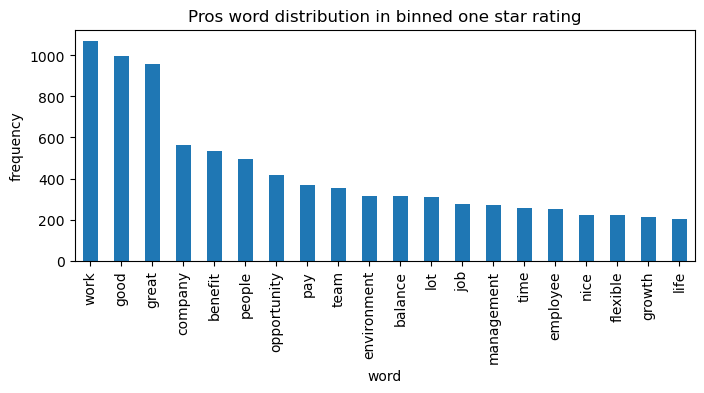

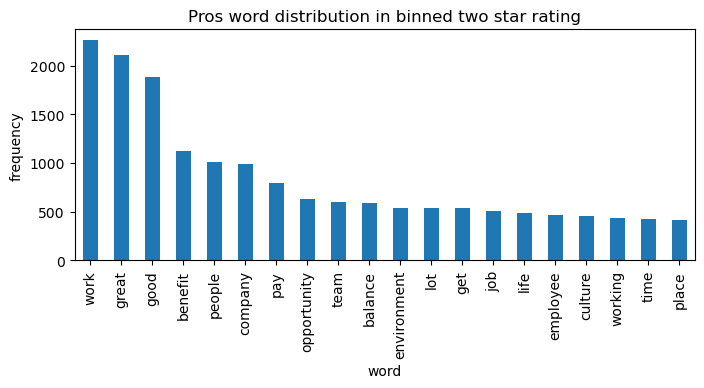

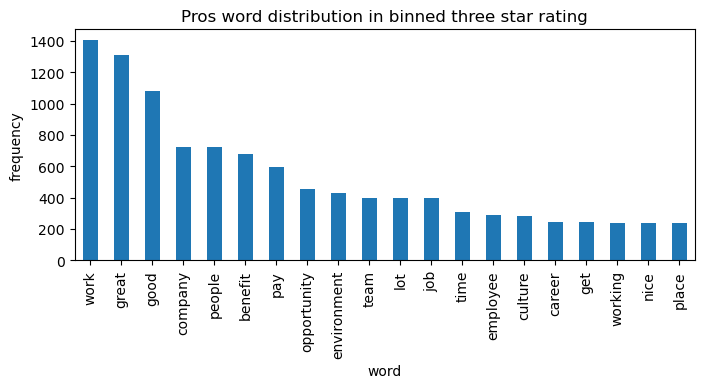

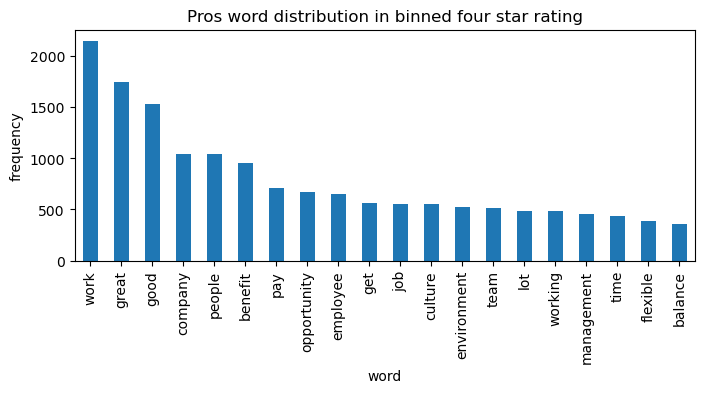

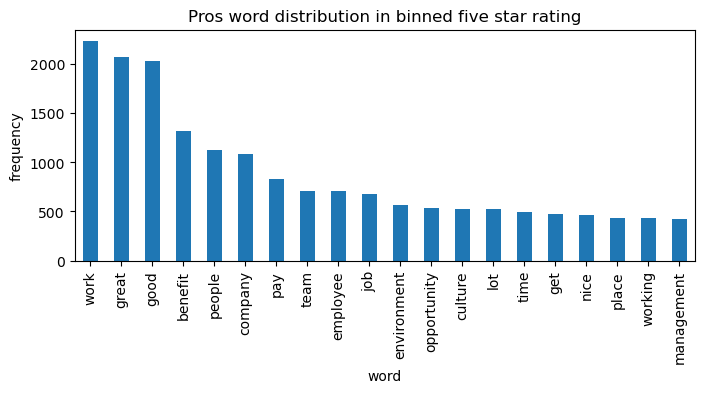

In [26]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Pros word distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


### Pros bigram

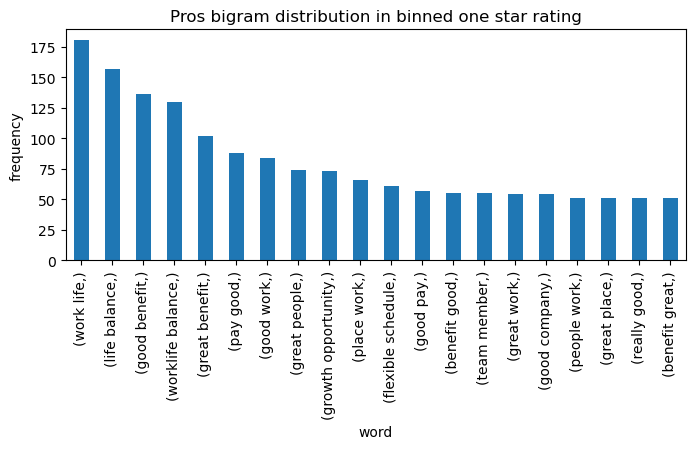

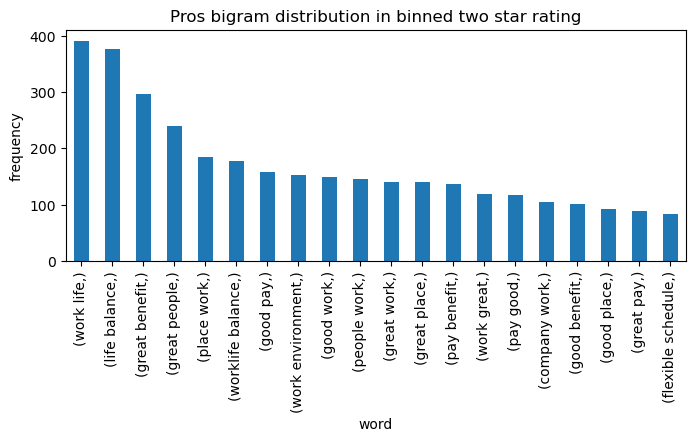

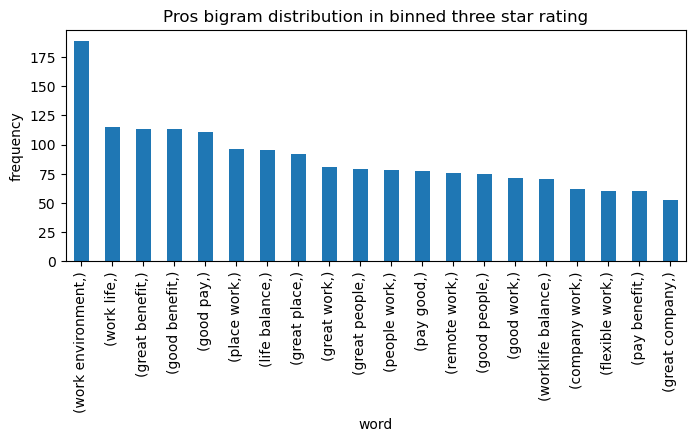

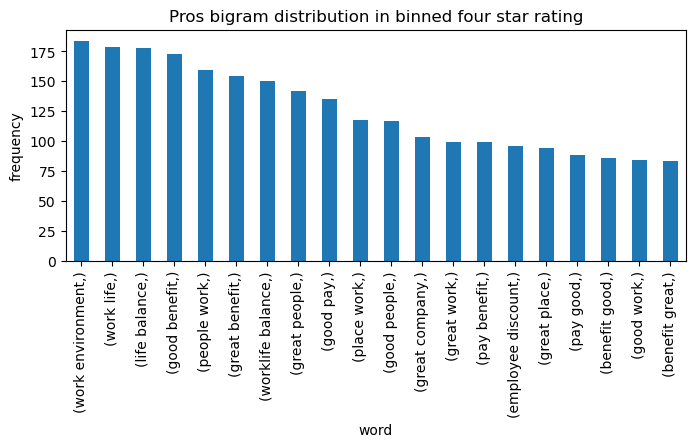

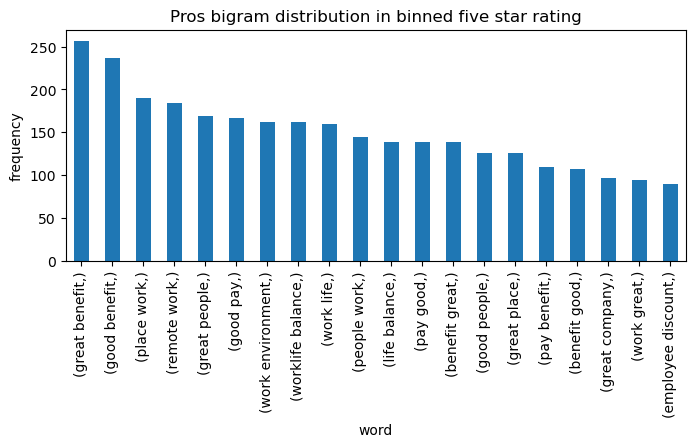

In [28]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Pros bigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

### Cons

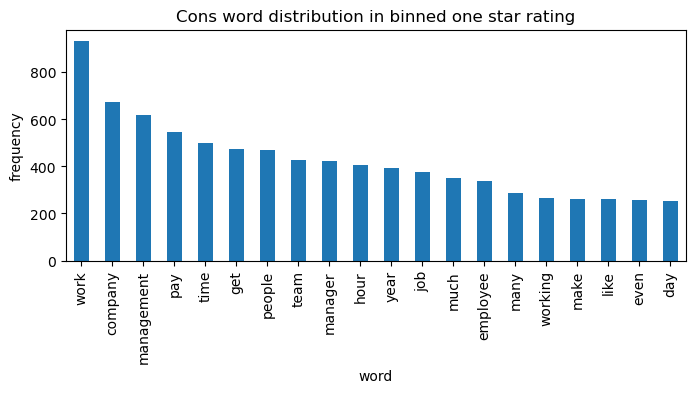

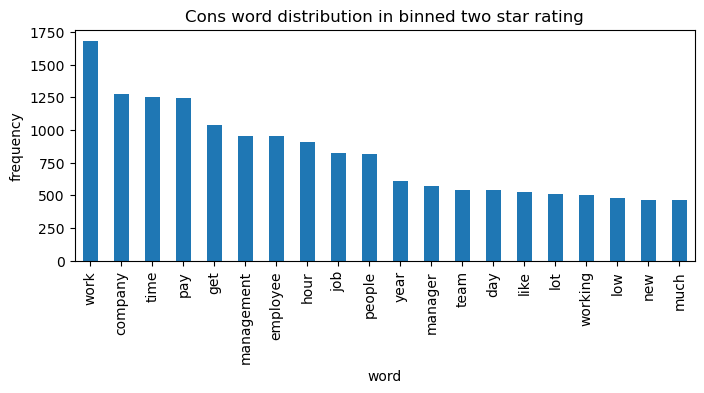

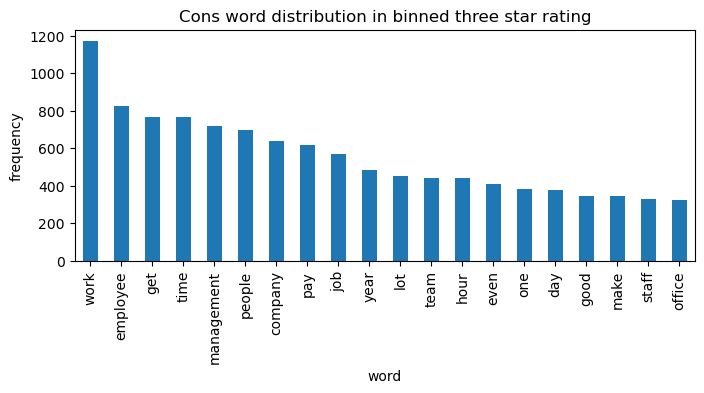

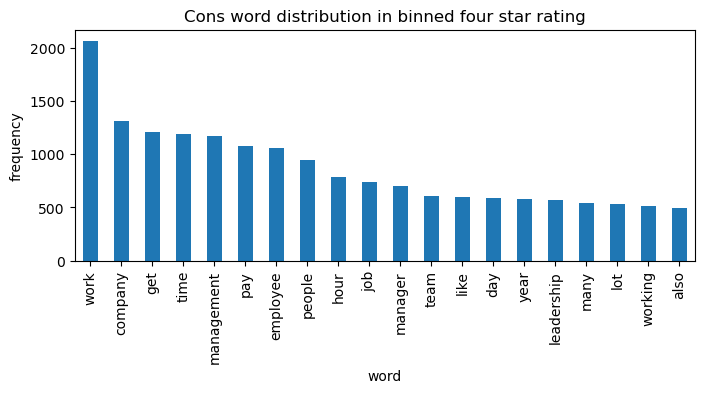

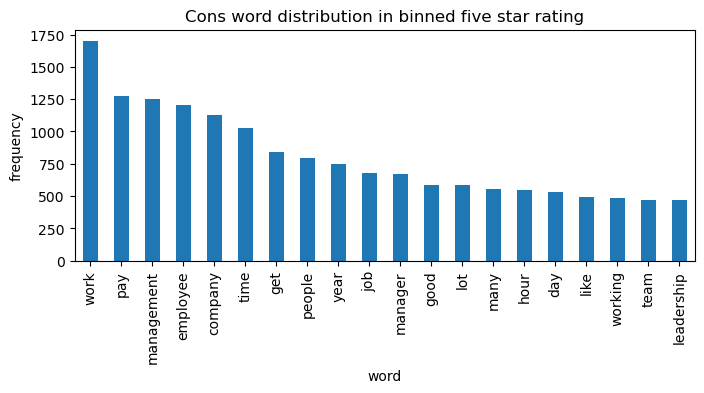

In [25]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Cons word distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


### Cons bigram

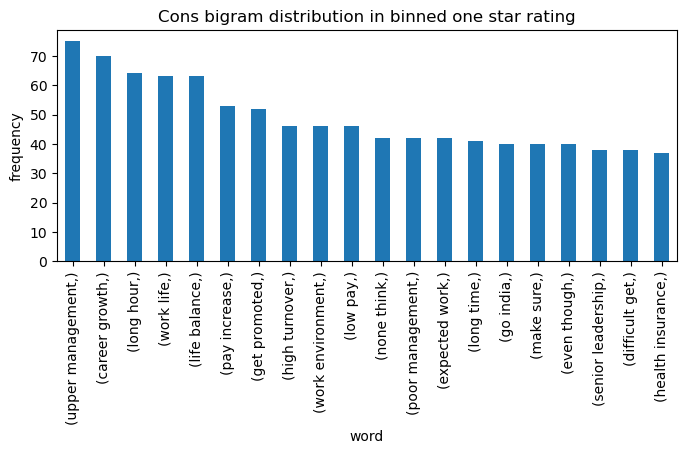

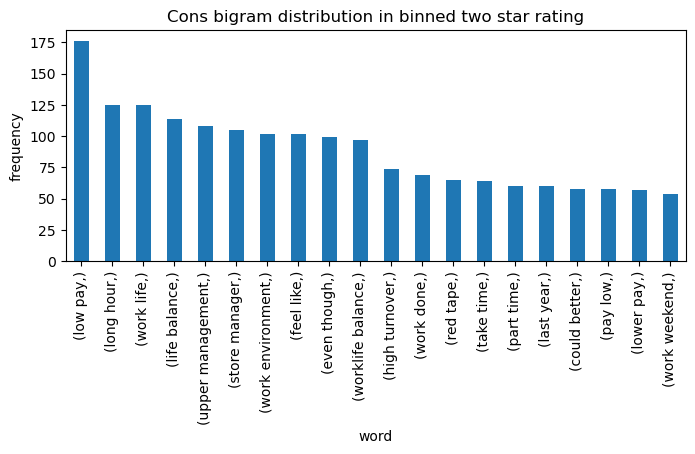

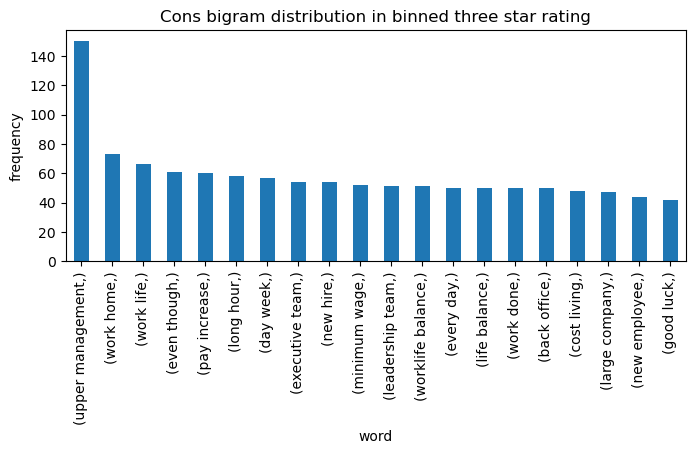

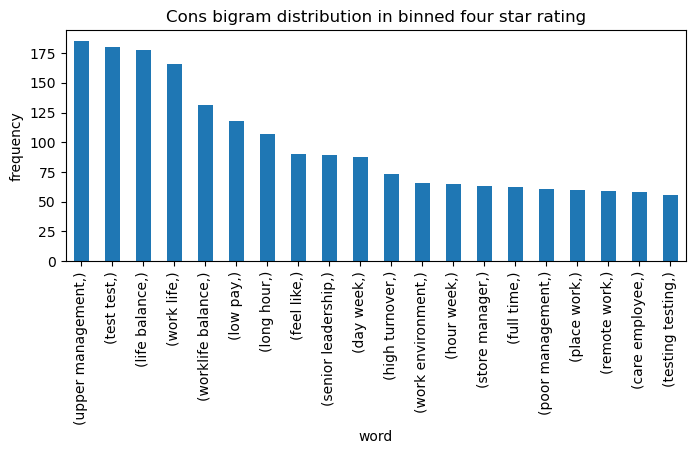

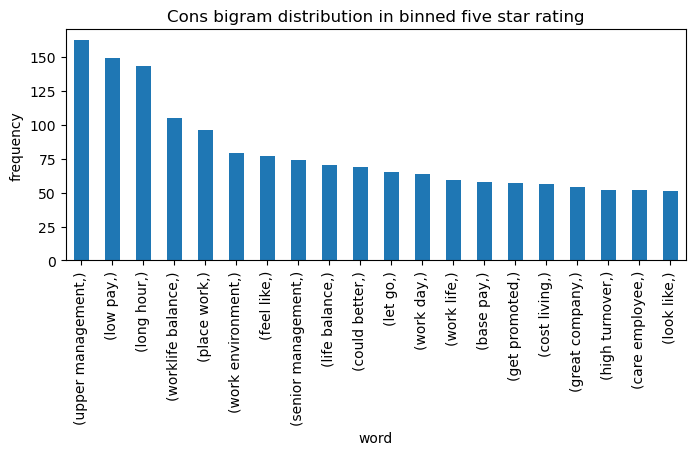

In [29]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Cons bigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

## 2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

In [35]:
# combine all the pros/cons revies as one string
pros_bigrams = generate_bigrams(" ".join(train.pros_lemmatized.values))
cons_bigrams = generate_bigrams(" ".join(train.cons_lemmatized.values))
# add list of bigrams to a dataframe
pros_bigrams = pd.DataFrame({'comb_pros_bigrams': pros_bigrams})
cons_bigrams = pd.DataFrame({'comb_cons_bigrams': cons_bigrams})
pros_bigrams.head(3)

,comb_pros_bigrams
0,good room
1,room growth
2,growth republic


### Pros

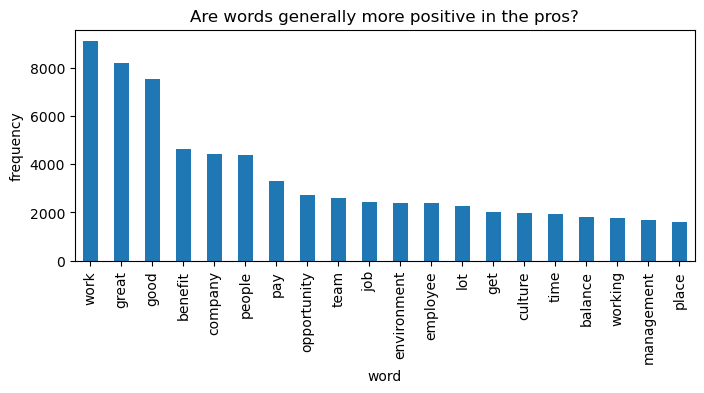

In [32]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

In [ ]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Pros bigram

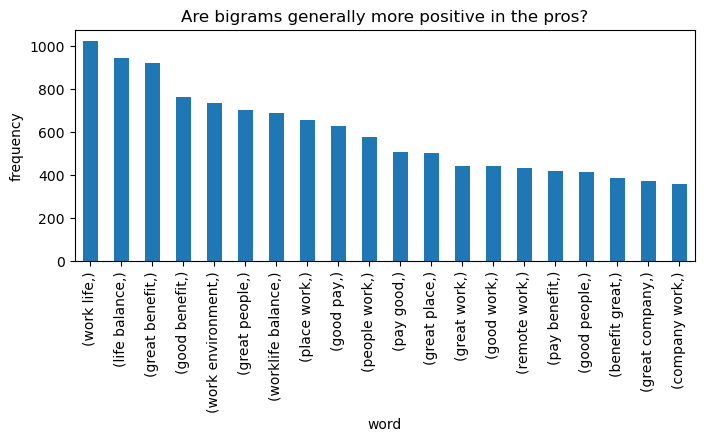

In [37]:
plt.figure(figsize=(8,3))
pd.Series(pros_bigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are bigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons

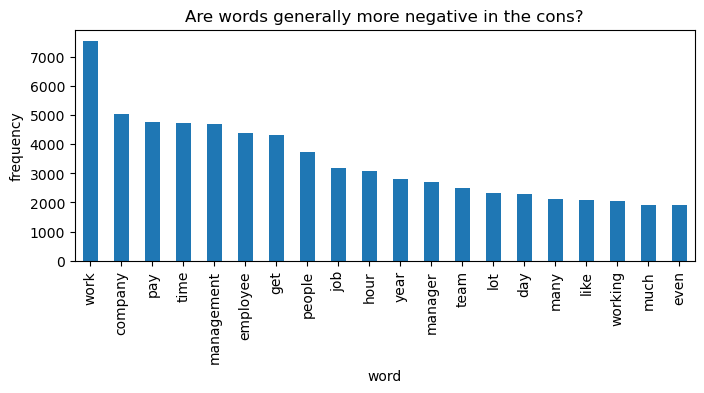

In [34]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more negative in the cons?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons bigram

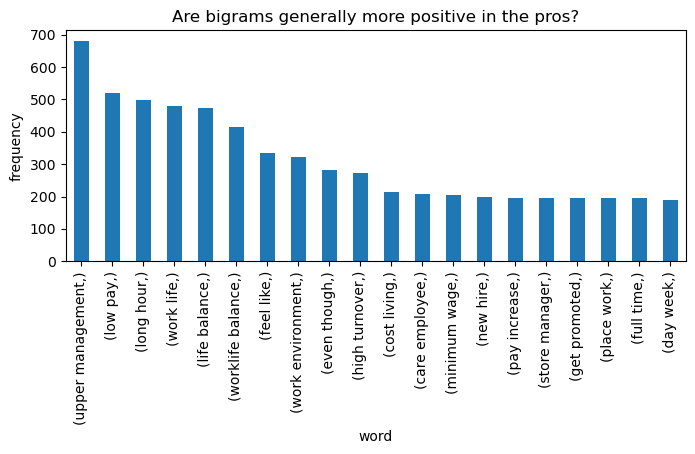

In [38]:
plt.figure(figsize=(8,3))
pd.Series(cons_bigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are bigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

## 3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

### Pros

In [41]:
# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four', "Five"]

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

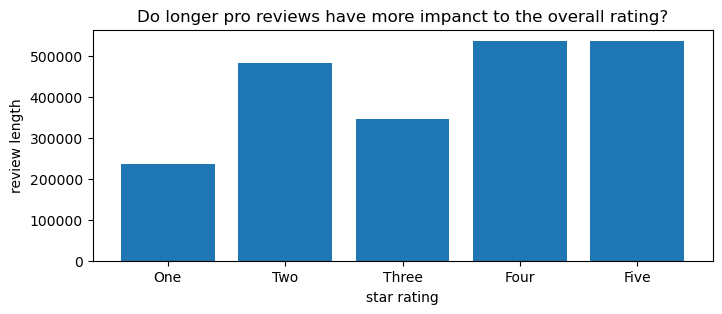

In [44]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

### Cons

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

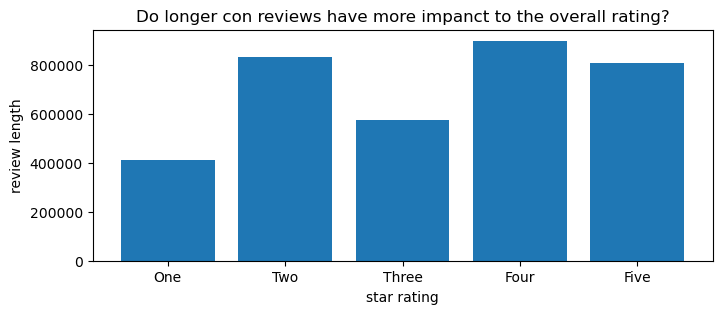

In [45]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer con reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

## 4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

In [46]:
# Define bin labels
low_bin_labels = ['One', 'Two', 'Three']
high_bin_labels = ['Four', 'Five']

### Low stars and positive sentiment (Combined pros and cons for each star)

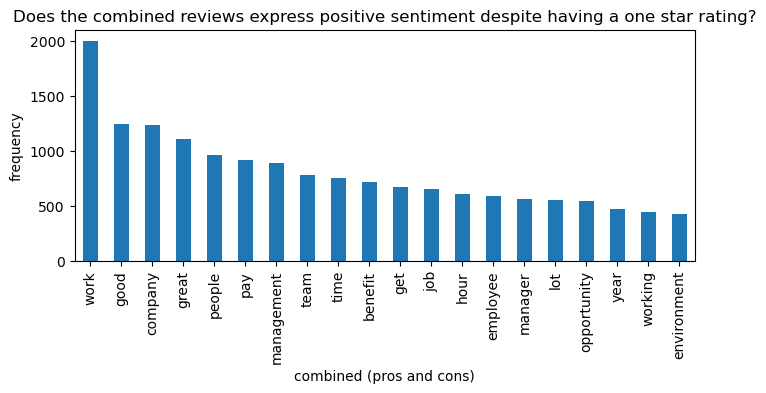

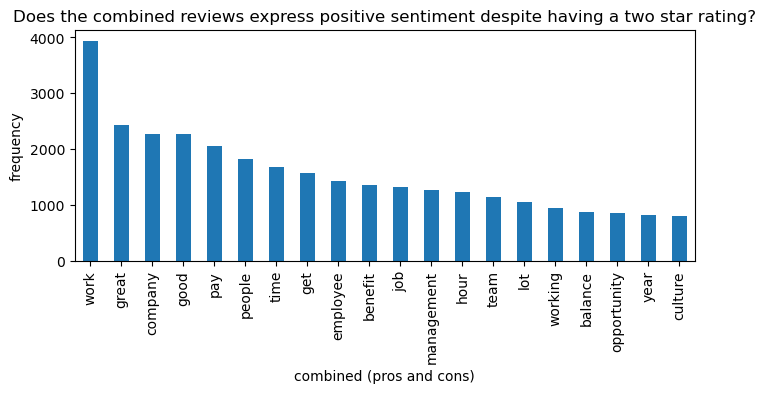

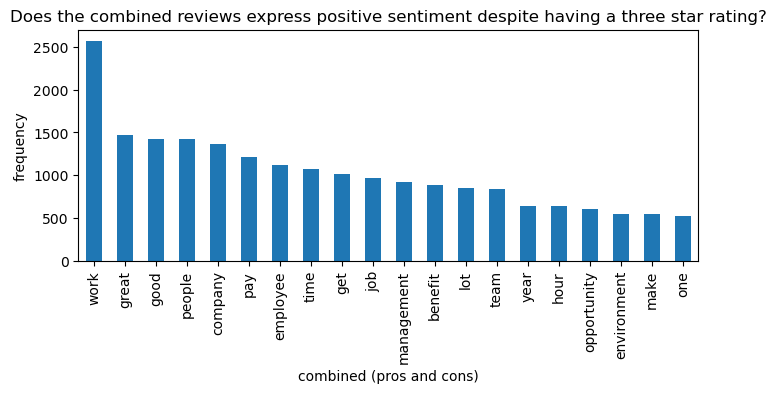

In [51]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### Low stars and positive sentiment (Combined pros bigram and cons bigram for each star)

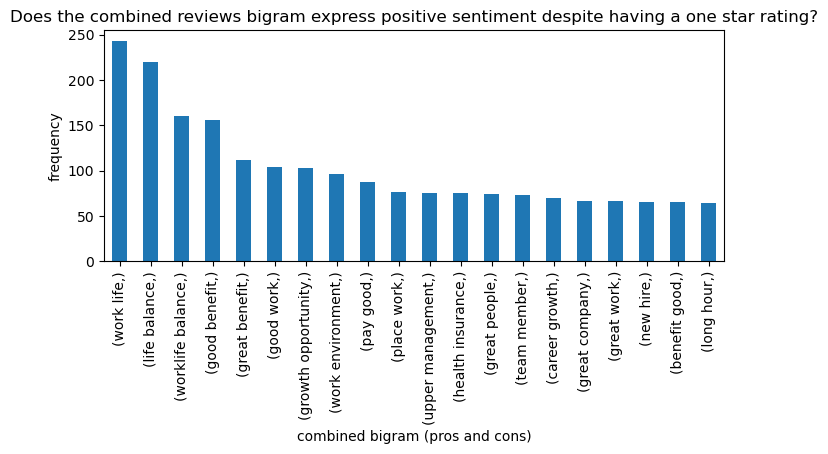

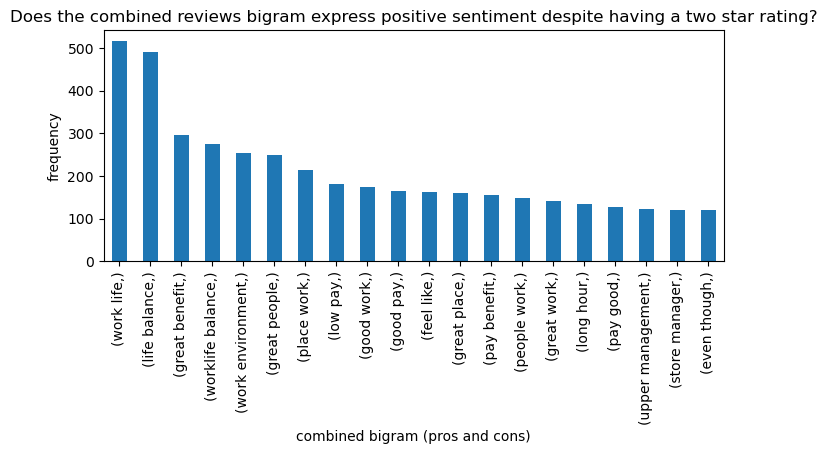

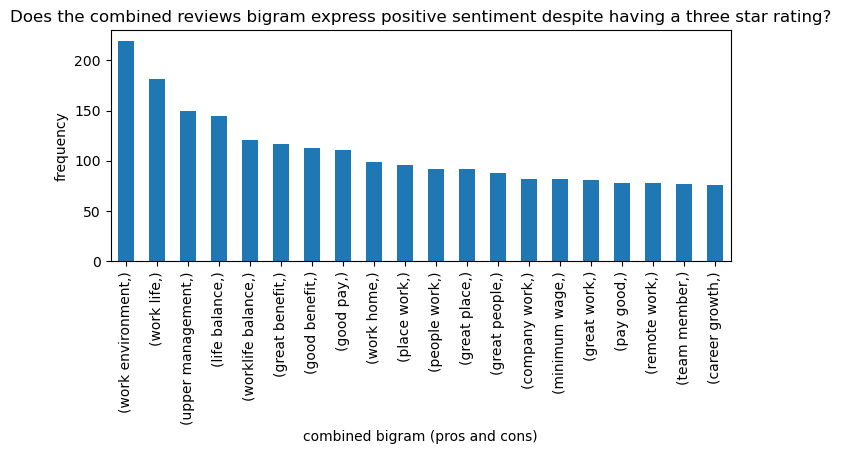

In [53]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    # split into bigrams
    pros_cons_bigram = generate_bigrams(pros_cons)
    pros_cons_bigram_df = pd.DataFrame({'pros cons bigram': pros_cons_bigram})
    
    # Calculate word counts
    pd.Series(pros_cons_bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews bigram express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined bigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### high stars and negative sentiment (Combined pros and cons for each star)

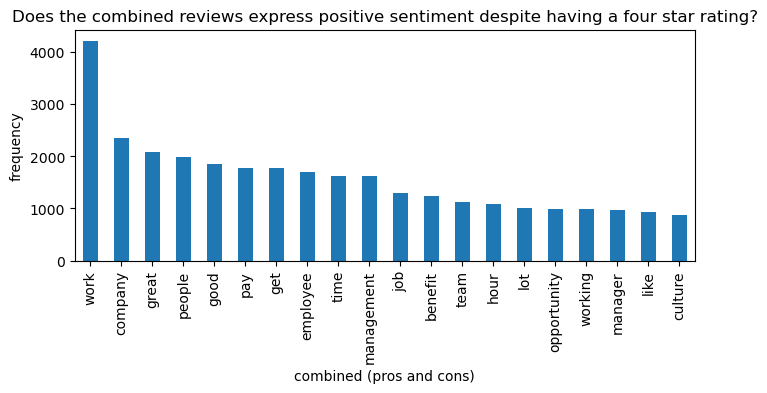

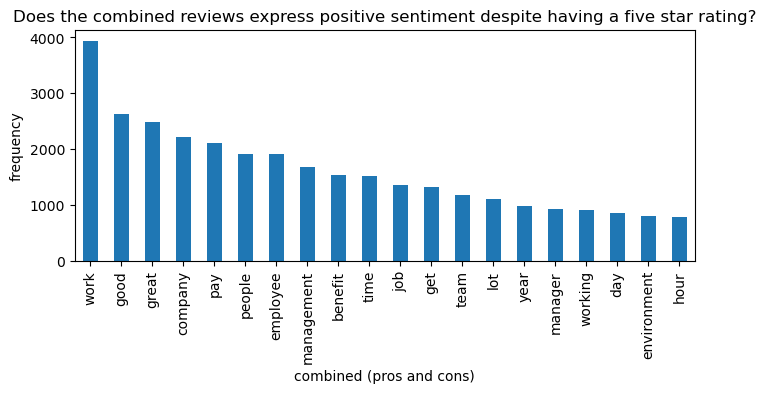

In [54]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

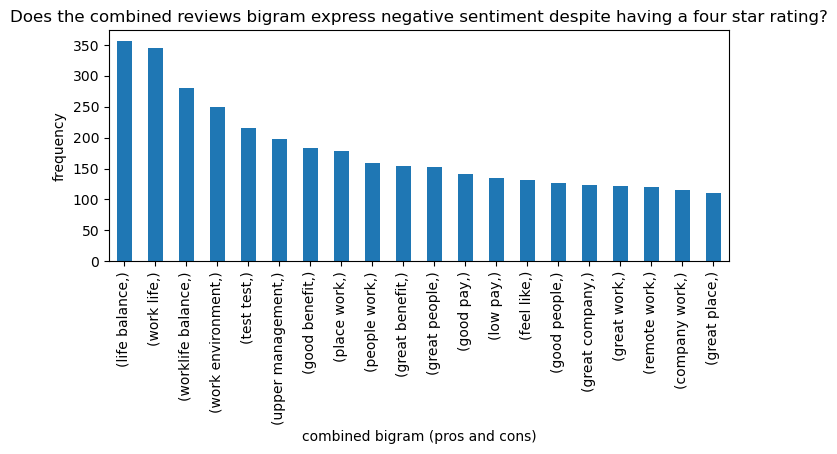

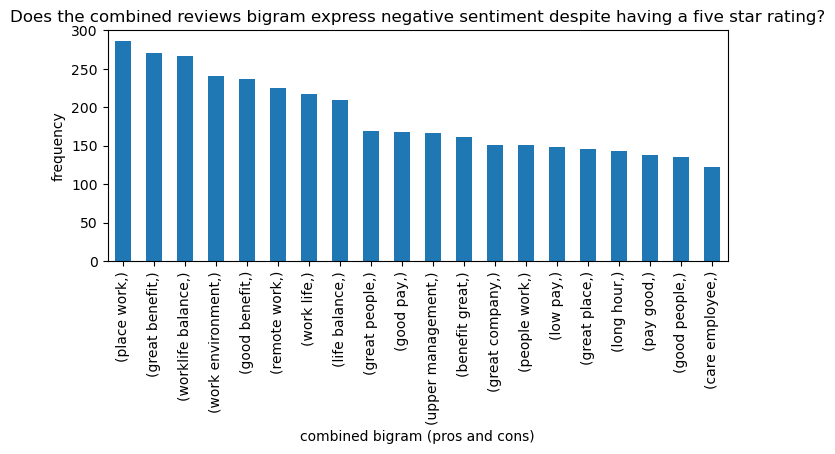

In [56]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    # split into bigrams
    pros_cons_bigram = generate_bigrams(pros_cons)
    pros_cons_bigram_df = pd.DataFrame({'pros cons bigram': pros_cons_bigram})
    
    # Calculate word counts
    pd.Series(pros_cons_bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews bigram express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined bigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()